In [1]:
import pandas as pd
import numpy as np
import os

import pandas as pd
df = pd.read_csv("csvs/processeddata.csv", index_col=0)
df.head()

,K,mag,filename,tmax,tinstability,Eerr1,Eerrf,tinstability_index,e1b,erms1b,...,max1storder2MMRlibamp1,fracermsfb,fracermsfc,fracermsfd,fracermsfe,fracermsff,fracermsfg,fracermsfh,maxef,maxfracermsf
0,125.210,0.139820,IC0K1.2521e+02mag1.3982e-01.bin,50000000.0,5.000000e+07,5.822356e-08,4.967208e-07,NaN,0.002367,0.001243,...,356.334231,0.487270,0.494937,0.108518,0.068320,0.100018,0.196089,0.486675,0.032116,0.494937
2,74.471,0.001196,IC2K7.4471e+01mag1.1961e-03.bin,50000000.0,5.000000e+07,3.297564e-07,2.164101e-07,NaN,0.000855,0.000229,...,4.390250,0.295920,0.038652,0.004406,0.001898,0.001828,0.002106,0.005915,0.053758,0.295920
4,859.130,0.043822,IC4K8.5913e+02mag4.3822e-02.bin,50000000.0,5.000000e+07,3.569262e-08,5.113791e-04,NaN,0.001009,0.000329,...,17.726364,0.487516,0.513079,0.526678,0.463731,0.345490,0.393021,0.472563,0.018533,0.526678
6,610.550,0.009907,IC6K6.1055e+02mag9.9069e-03.bin,50000000.0,2.869029e+06,2.234090e-06,8.162635e-01,2869.0,0.006052,0.003035,...,358.788322,0.533689,0.491046,0.409612,0.466585,0.500542,0.464851,0.392296,0.037787,0.533689
7,14.211,0.218650,IC7K1.4211e+01mag2.1865e-01.bin,50000000.0,5.000000e+07,3.204928e-08,1.226401e-03,NaN,0.029537,0.015570,...,69.306545,0.533720,0.503366,0.501564,0.324127,0.283239,0.406181,0.437239,0.081857,0.533720


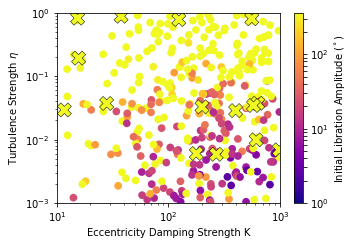

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig, ax0 = plt.subplots(figsize=(5,3.5))

cm = plt.cm.get_cmap('plasma')
dfstable = df[df['Eerrf']<1.e-2]
sc = ax0.scatter(dfstable['K'], dfstable['mag'], c=dfstable['max3MMRlibamp1'], edgecolor='', vmin=1, vmax=360, s=60,cmap=cm, norm=mpl.colors.LogNorm())        
dfunstable = df[df['Eerrf']>1.e-2]
sc = ax0.scatter(dfunstable['K'], dfunstable['mag'], c=dfunstable['max3MMRlibamp1'], edgecolor='k', lw=0.5, vmin=1, vmax=360, s=200,cmap=cm, marker='X', norm=mpl.colors.LogNorm())        

ax0.set_xlabel('Eccentricity Damping Strength K')
ax0.set_ylabel('Turbulence Strength '+r'$\eta$')  
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlim([10,1000])
ax0.set_ylim([1.e-3, 1])

cbar = fig.colorbar(sc)
cbar.ax.set_ylabel('Initial Libration Amplitude ($^\circ$)')
fig.savefig('fig4.pdf', bbox_inches='tight')